## 演習問題の解答

---

- Q1. ワインデータセットの全ての説明変数と目的変数について一望できるように，単一の画像に全部の変数のプロットを複数グラフにて出力させてください．このとき，説明変数と目的変数の違いがわかるように，目的変数のグラフだけ色を変えてください．axes の生成について，ax = [None] * len(list(wine_x.columns)) として空のリストを作成し，for 文で wine_x のカラム名で回すような書き方にすると，行数が少なく済むでしょう．次のような出力を期待します．

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine, load_digits

wine_x, wine_y = load_wine(return_X_y=True, as_frame=True)
digi_x, digi_y = load_digits(return_X_y=True, as_frame=False)
digi_x = digi_x.reshape((-1, 8, 8))

In [2]:
len(list(wine_x.columns))

13

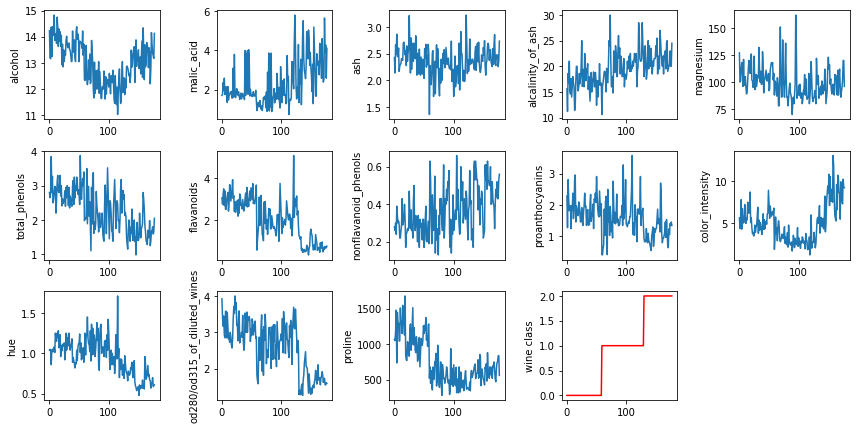

In [3]:
fig = plt.figure(figsize=(12, 6), facecolor="white")
ax = [None] * (len(list(wine_x.columns)) + 1)
for i, name in enumerate(wine_x.columns):
    ax[i] = fig.add_subplot(3, 5, i+1)
    ax[i].plot(wine_x[name])
    ax[i].set_ylabel(name)
i+=1
ax[i] = fig.add_subplot(3, 5, i+1)
ax[i].plot(wine_y, color="red")
ax[i].set_ylabel("wine class")
fig.tight_layout()
plt.show()

- Q2. Q1 と同様に今度は mnist データセットについて，画像を一度に 100 個表示させてみましょう．ただし，画像はグレイスケール，ラベル情報をタイトルに記載，グラフ数は縦 5 x 横 20 とします．次のような出力を期待します．

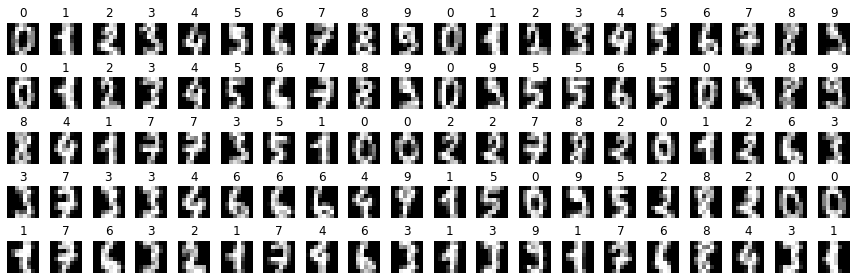

In [4]:
fig = plt.figure(figsize=(12, 4), facecolor="white")
ax = [None] * 100
for i in range(100):
    ax[i] = fig.add_subplot(5, 20, i+1)
    ax[i].imshow(digi_x[i], cmap="gray")
    ax[i].set_title(digi_y[i])
    ax[i].axis("off")
fig.tight_layout()
plt.show()

- Q3. mnist データセットについて，数字の個数に対するヒストグラムを表示しましょう．0 ~ 9 なので，bins=10 とすると丁度よいでしょう．次のような出力を期待します．

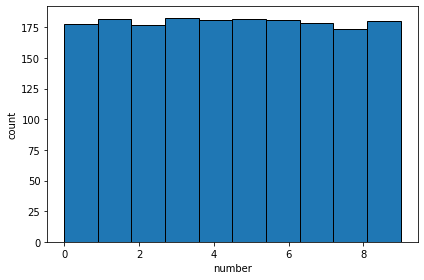

In [5]:
fig = plt.figure(facecolor="white")
ax = plt.axes()
ax.hist(x=digi_y, bins=10, edgecolor="black")
ax.set_xlabel("number")
ax.set_ylabel("count")
fig.tight_layout()
plt.show()

もしくは，

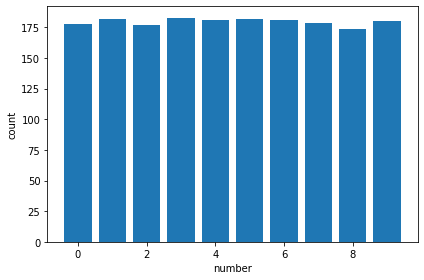

In [6]:
import numpy as np

nums, counts = np.unique(digi_y, return_counts=True)

fig = plt.figure(facecolor="white")
ax = plt.axes()
ax.bar(x=nums, height=counts)
ax.set_xlabel("number")
ax.set_ylabel("count")
fig.tight_layout()
plt.show()

- Q4. ワインデータセットにおいて，フェノールの総含有量 (total_phenols) と色の濃さ (color_intensity) がワインの等級 (wine_y) に及ぼす影響を可視化するために，等級で色分けされたフェノール含有量と色の濃さについての散布図を描画してみましょう．

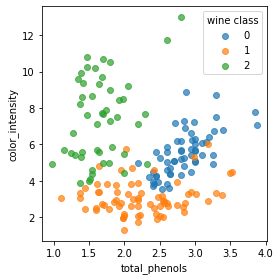

In [7]:
fig = plt.figure(figsize=(4, 4), facecolor="white")
ax = plt.axes()
for k in sorted(set(wine_y)):
    idx = np.where(wine_y == k)[0]
    x = wine_x["total_phenols"][idx]
    y = wine_x["color_intensity"][idx]
    ax.scatter(x=x, y=y, label=k, alpha=0.7)
ax.set_xlabel("total_phenols")
ax.set_ylabel("color_intensity")
ax.legend(title="wine class")
fig.tight_layout()
plt.show()